In [1]:
# Error occurs because scipy package is not installed
# To fix, run this in terminal/command prompt first:
# !pip install scipy

from scipy.io import loadmat


In [2]:
def read_HSI():
    X = loadmat('PaviaU.mat')['paviaU']
    y = loadmat('PaviaU_gt.mat')['paviaU_gt']
    print(f"X shape: {X.shape}\ny shape: {y.shape}")
    return X, y

X, y = read_HSI()

X shape: (610, 340, 103)
y shape: (610, 340)


In [8]:
# !pip install matplotlib -q

In [4]:
from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 900

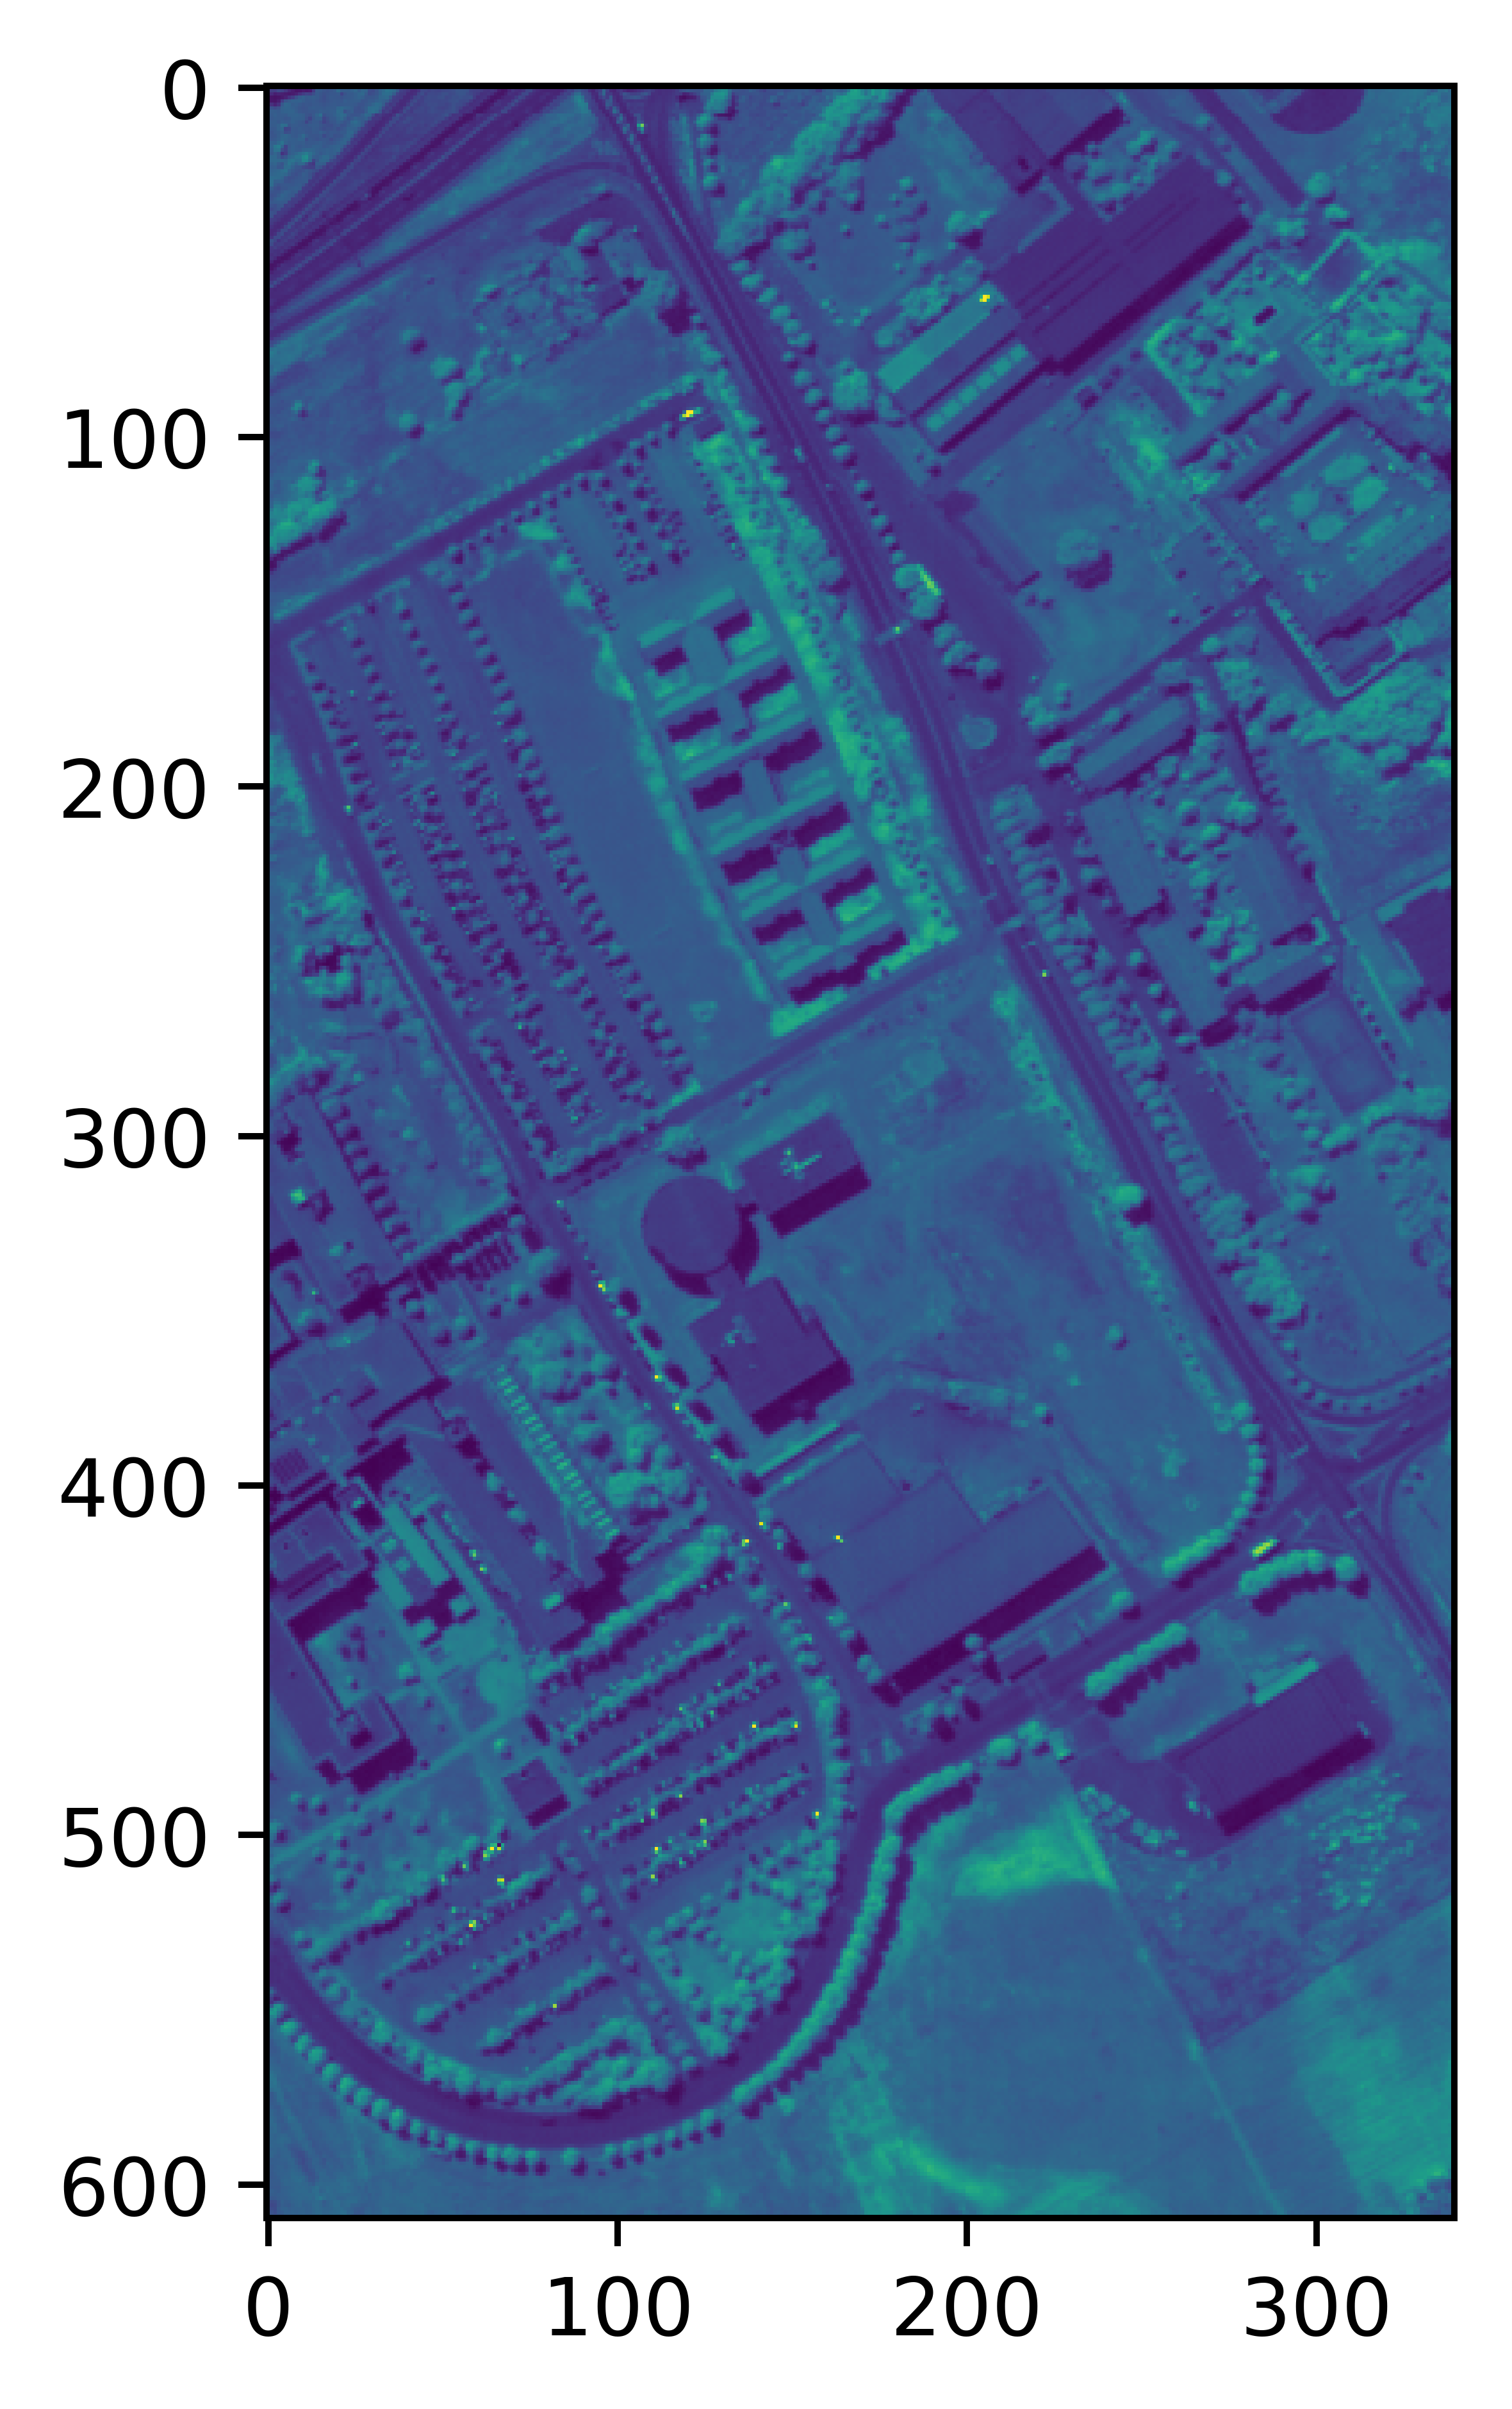

In [5]:
im=X[:,:,101]
plt.imshow(im)

In [8]:
im

array([[3238, 2464, 2345, ..., 2940, 2774, 2539],
       [2607, 1561, 1531, ..., 3251, 2806, 2527],
       [2167, 1109,  791, ..., 2791, 2879, 2809],
       ...,
       [2189, 1983, 1939, ..., 2385, 2448, 2541],
       [2179, 2141, 1997, ..., 2551, 2452, 2432],
       [2132, 2260, 2222, ..., 2407, 2308, 2447]], dtype=uint16)

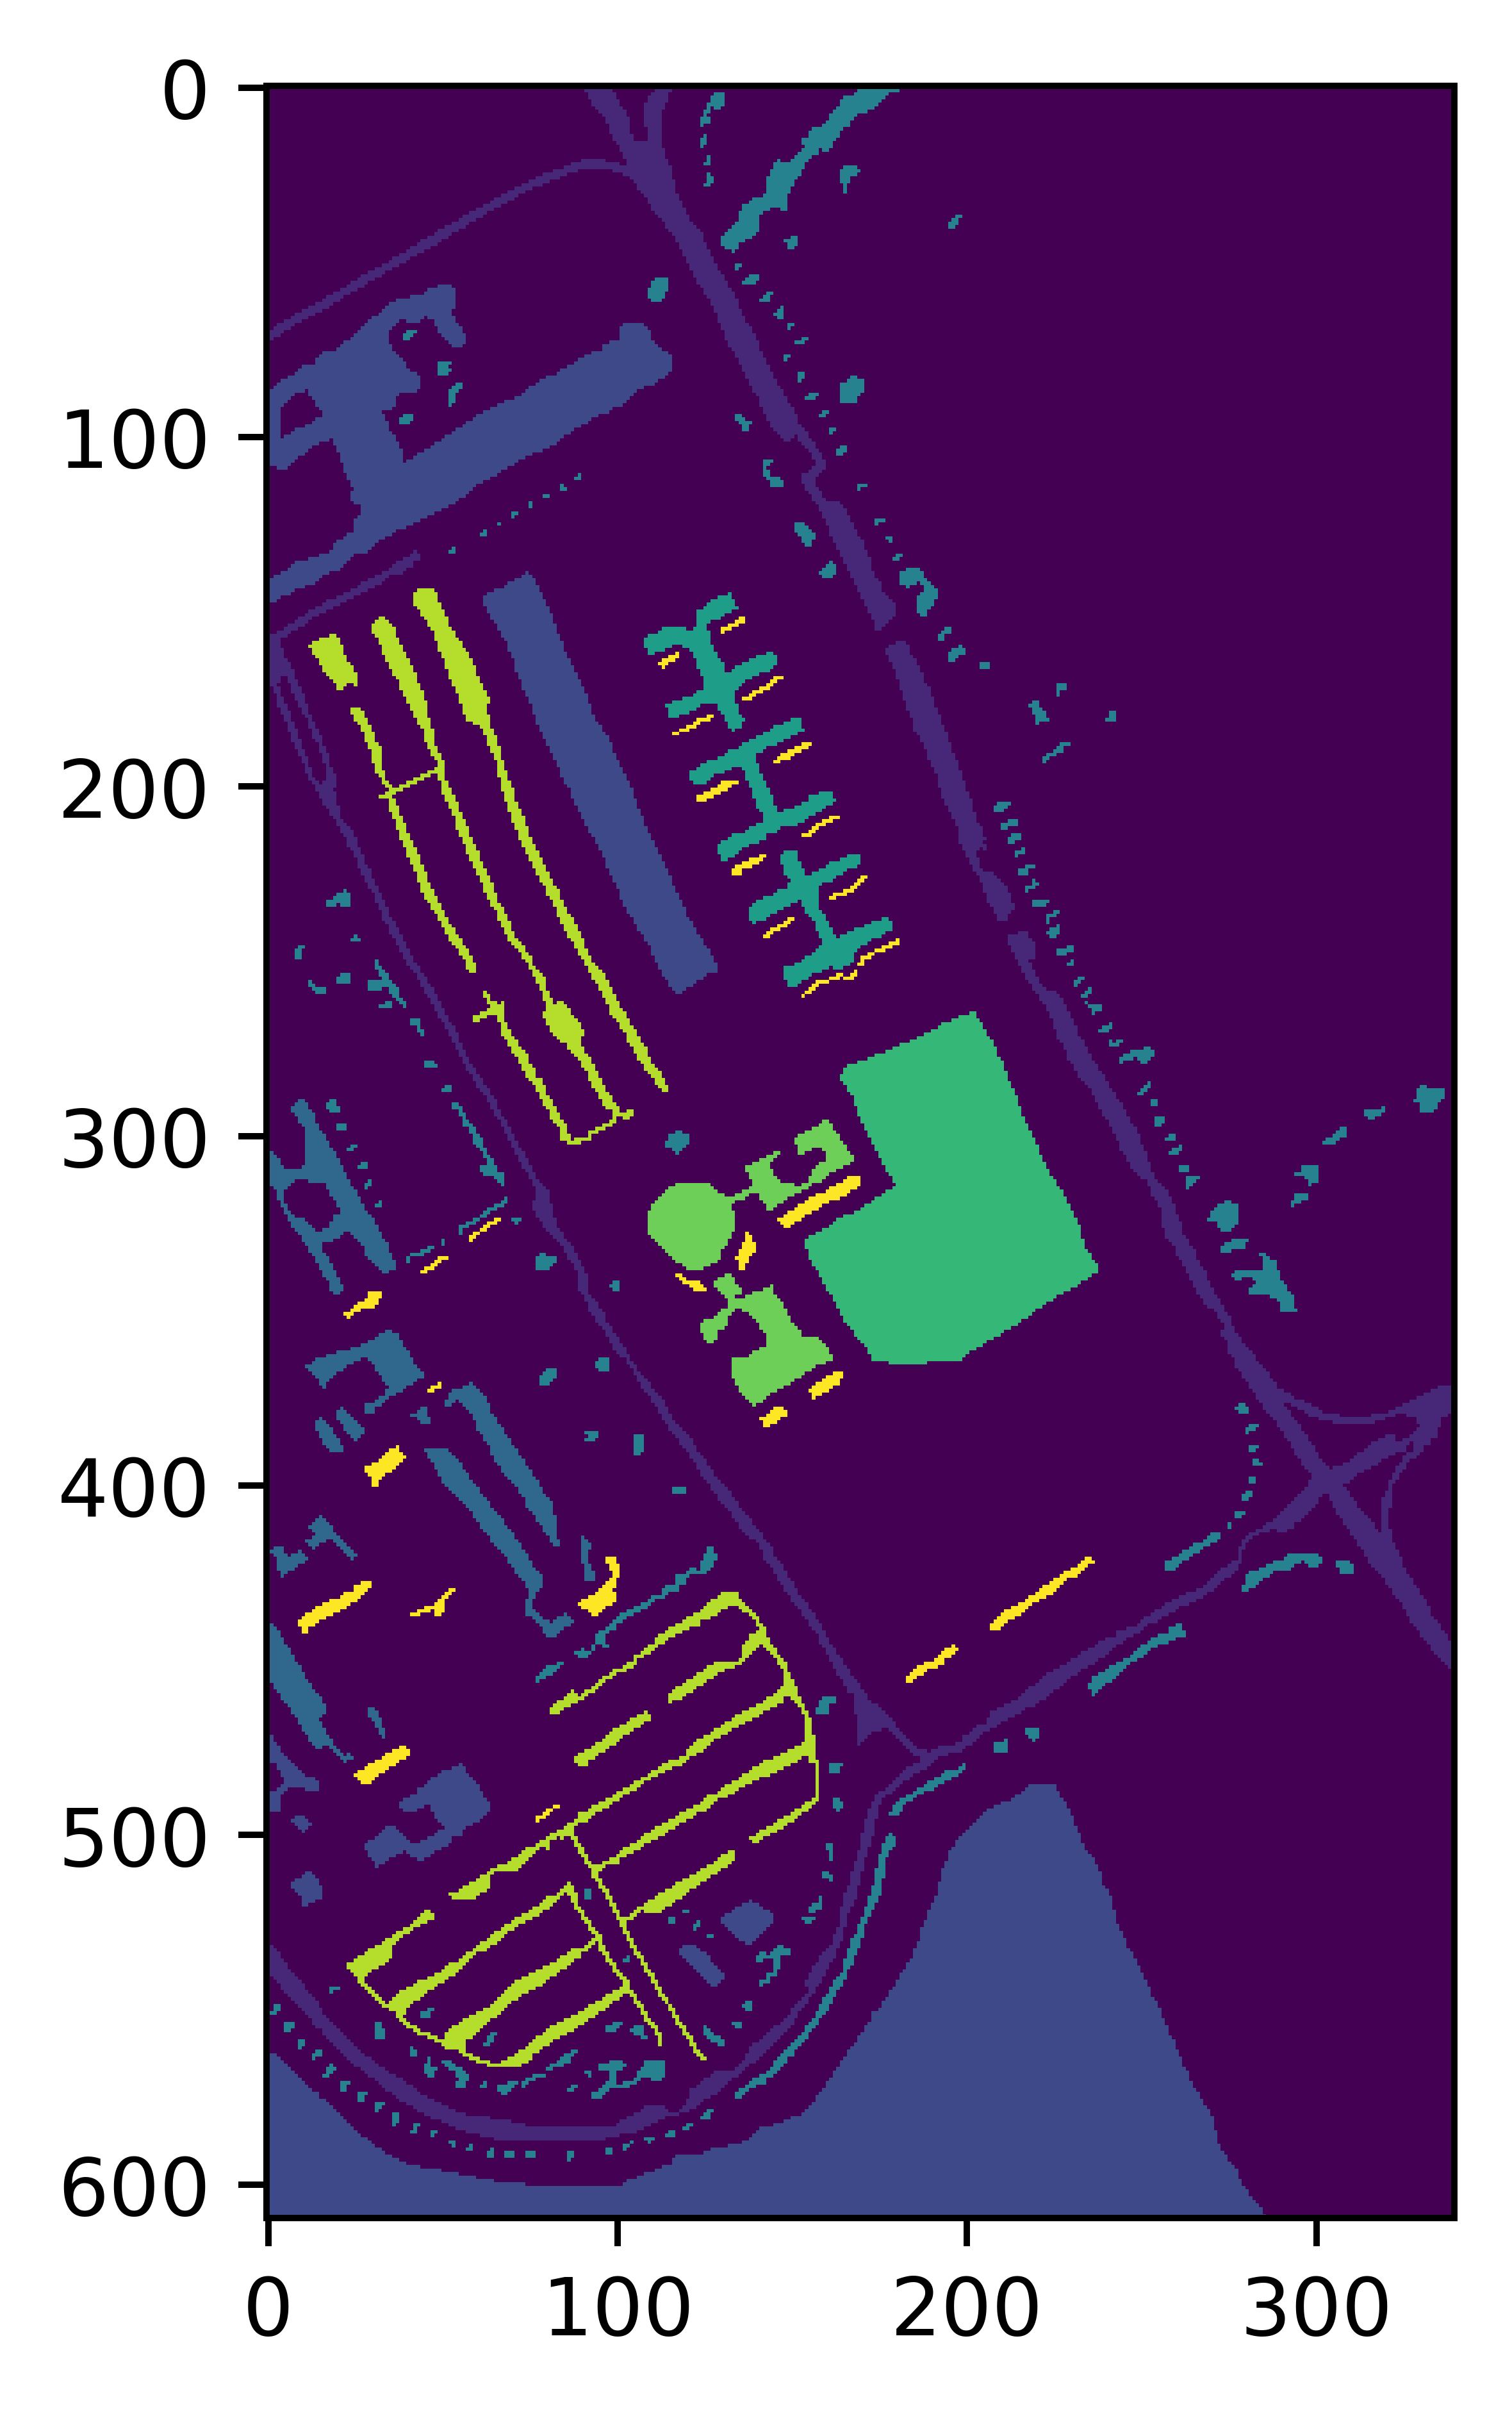

In [11]:
plt.imshow(y)

In [1]:
y

NameError: name 'y' is not defined

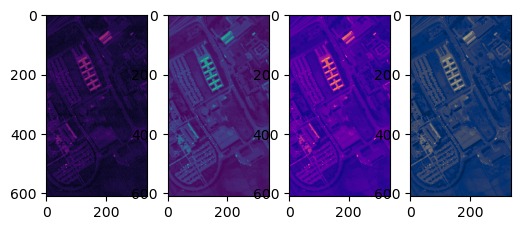

In [11]:
plt.subplot(1,4,1)
plt.imshow(X[:,:,0],cmap='inferno')
plt.subplot(1,4,2)
plt.imshow(X[:,:,10],cmap='viridis')
plt.subplot(1,4,3)
plt.imshow(X[:,:,20],cmap='plasma')
plt.subplot(1,4,4)
plt.imshow(X[:,:,30],cmap='cividis')

In [12]:
!pip install imutils

import imutils
rot = imutils.rotate(X[:,:,50], angle=10)

In [13]:
moving=rot
fixed=X[:,:,60]

Text(0.5, 1.0, 'fixed:band60')

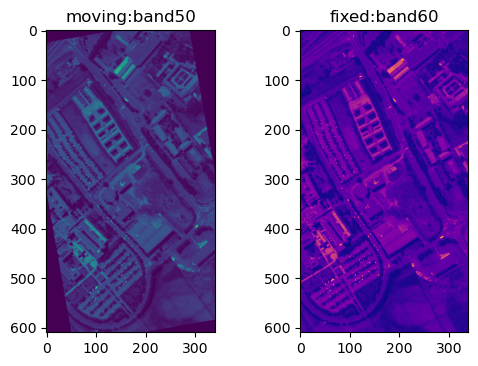

In [14]:
plt.subplot(1,2,1)
plt.imshow(moving,cmap='viridis')
plt.title('moving:band50')
plt.subplot(1,2,2)
plt.imshow(fixed,cmap='plasma')
plt.title('fixed:band60')


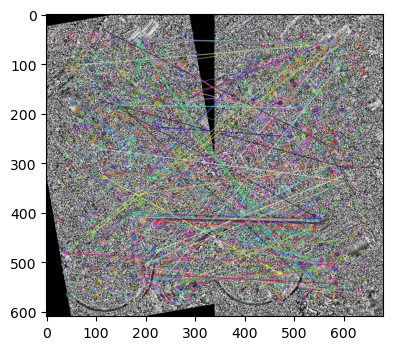

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img1=moving
img2=fixed

im1Gray = np.uint8(img1)
im2Gray = np.uint8(img2)


MAX_FEATURES=2000
GOOD_MATCH_PERCENT=0.04499
# Detect ORB features and compute descriptors.
orb = cv2.ORB_create(MAX_FEATURES)
keypoints1, descriptors1 = orb.detectAndCompute(im1Gray, None)
keypoints2, descriptors2 = orb.detectAndCompute(im2Gray, None)
 
# Match features.
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
matches = matcher.match(descriptors1, descriptors2, None)
 
# Sort matches by score
matches.sort(key=lambda x: x.distance, reverse=False)
 
# Remove not so good matches
numGoodMatches = int(len(matches) * GOOD_MATCH_PERCENT)
matches = matches[:numGoodMatches]
 
# Draw top matches
imMatches = cv2.drawMatches(im1Gray, keypoints1, im2Gray, keypoints2, matches, None)
# cv2.imwrite(os.path.join('./registration/',filename), imMatches)
plt.imshow(imMatches)



In [16]:
# Extract location of good matches
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)
 
for i, match in enumerate(matches):
  points1[i, :] = keypoints1[match.queryIdx].pt
  points2[i, :] = keypoints2[match.trainIdx].pt
 
# Find homography
h, mask = cv2.findHomography(points1, points2, cv2.RANSAC)
print(h)






[[ 6.74476862e-01 -1.54924500e-01  8.24783304e+01]
 [-1.17907003e-01  8.43065015e-01  3.21084691e+01]
 [-6.65440922e-04 -3.08896758e-05  1.00000000e+00]]


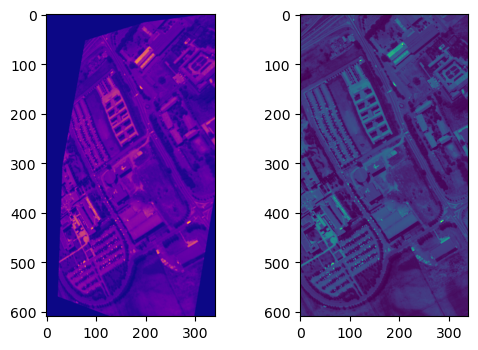

In [17]:
# Use homography
height, width = im1Gray.shape
im1Reg = cv2.warpPerspective(img1, h, (width, height))
 
plt.subplot(1,2,2);plt.imshow(img2,cmap='viridis')
plt.subplot(1,2,1);plt.imshow(im1Reg,cmap='plasma')


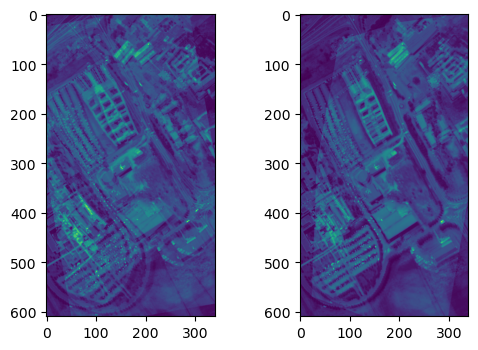

In [18]:
result = cv2.addWeighted(img2, 0.5, im1Reg, 0.5, 0)
resulto = cv2.addWeighted(img2, 0.5, img1, 0.5, 0)
plt.subplot(1,2,1)
plt.imshow(resulto,cmap='viridis')
plt.subplot(1,2,2)

plt.imshow(result,cmap='viridis')